# A3

Name: Erik Flink

Student Number: s46267445

## 1. Data Preparation

### Load Data

In [121]:
# import pandas library using alias pd
import pandas as pd
import numpy as np

df = pd.read_csv(filepath_or_buffer='amzn.us.csv')
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1997-05-16,1.97,1.98,1.71,1.73,14700000,0
1,1997-05-19,1.76,1.77,1.62,1.71,6106800,0
2,1997-05-20,1.73,1.75,1.64,1.64,5467200,0
3,1997-05-21,1.64,1.65,1.38,1.43,18853200,0
4,1997-05-22,1.44,1.45,1.31,1.40,11776800,0


### Time series indexing

Setting the datetime values as the index for the data frame is essential to properly analyse the timeserties data.

In [122]:
# set index for the dataframe
df = df.set_index(['Date'])

# modify Datetime index datatype from 'object' to 'datatime64[ns]'
df.index = df.index.astype('datetime64[ns]')

### Valueless column

When visualising timeseries data it is important to convert the time to the right timezone. For this dataset however, only the dates are present, meaning it is not necessary to convert the time zone.

The OpenInt column can be seen to have a value of 0 for each row, if this is true, the column may be removed as it wouldn't tell us anything.

In [123]:
# Check if there are other values apart from 0 in the OpenInt column
df["OpenInt"].unique()

df = df.drop(["OpenInt"], axis=1)
df

,Open,High,Low,Close,Volume
Date,,,,,
1997-05-16,1.97,1.98,1.71,1.73,14700000
1997-05-19,1.76,1.77,1.62,1.71,6106800
1997-05-20,1.73,1.75,1.64,1.64,5467200
1997-05-21,1.64,1.65,1.38,1.43,18853200
1997-05-22,1.44,1.45,1.31,1.40,11776800
...,...,...,...,...,...
2017-11-06,1109.15,1125.41,1108.77,1120.66,3331738
2017-11-07,1124.74,1130.60,1117.50,1123.17,2684443
2017-11-08,1122.82,1135.54,1119.11,1132.88,2576010


### Missing values

In [124]:
print("Total number of null/missing Date values:", df.index.isna().sum())
print("Total number of null/missing Open values:", df['Open'].isna().sum())
print("Total number of null/missing High values:", df['High'].isna().sum())
print("Total number of null/missing Low values:", df['Low'].isna().sum())
print("Total number of null/missing Close values:", df['Close'].isna().sum())
print("Total number of null/missing Volume values:", df['Volume'].isna().sum())

Total number of null/missing Date values: 0
Total number of null/missing Open values: 0
Total number of null/missing High values: 0
Total number of null/missing Low values: 0
Total number of null/missing Close values: 0
Total number of null/missing Volume values: 0


No null/missing values are present.

### Side or Exogenous variables

The volume column is the main column that will be analysed.

By using a Heatmap we can find which variables correlate to the volume column.

In [125]:
df.corr().style.background_gradient(cmap='YlOrRd')

,Open,High,Low,Close,Volume
Open,1.000000,0.999940,0.999916,0.999864,-0.299983
High,0.999940,1.000000,0.999902,0.999936,-0.297974
Low,0.999916,0.999902,1.000000,0.999939,-0.301425
Close,0.999864,0.999936,0.999939,1.000000,-0.299428
Volume,-0.299983,-0.297974,-0.301425,-0.299428,1.000000


Above we can see all columns apart from volume are very strongly correlated with each other but they also share the same correlation value to volume. For this reason, any one of these columns may remain while the others are removed without loss of data as one column is strongly represents the other columns. 

In [396]:
df = df.drop(columns = ["High", "Low", "Close", "Open"], axis=1)
df.head()


KeyError: "['High', 'Low', 'Close', 'Open'] not found in axis"

## 2. Exploratory Data Analysis

In [127]:
df2 = df.loc['2015']
df2

,Volume
Date,
2015-01-02,2788051
2015-01-05,2774112
2015-01-06,3518547
2015-01-07,2640299
2015-01-08,3087596
...,...
2015-12-24,1092970
2015-12-28,3783555
2015-12-29,5734996


In [128]:
# Using Datetime index to get the month,hour and day of the week
# assigning it to the new column in the dataframe df2, so that we can use it to visualise different trend cycle or seasonality
df2['month']=df2.index.month_name()
df2['day_of_week'] =df2.index.day_name()
df2

,Volume,month,day_of_week
Date,,,
2015-01-02,2788051,January,Friday
2015-01-05,2774112,January,Monday
2015-01-06,3518547,January,Tuesday
2015-01-07,2640299,January,Wednesday
2015-01-08,3087596,January,Thursday
...,...,...,...
2015-12-24,1092970,December,Thursday
2015-12-28,3783555,December,Monday
2015-12-29,5734996,December,Tuesday


Text(0.5, 0, 'Date')

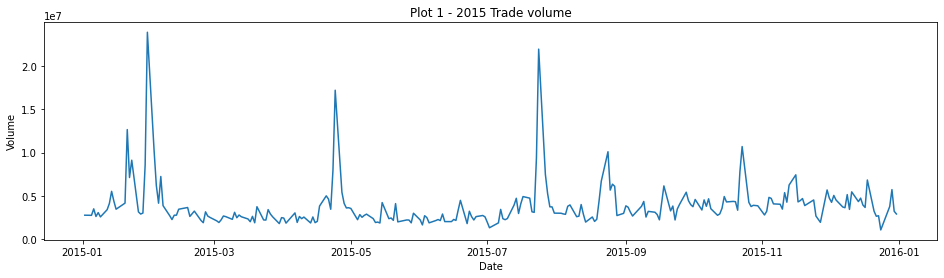

In [129]:
# import matplotlib and seaborn packages for using different plot and aligning them.
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting all the data for year 2020. plot() uses line as a default
plt.figure(figsize=(16,4))
plt.plot(df2['Volume'])
plt.title('Plot 1 - 2015 Trade volume')
plt.ylabel('Volume')
plt.xlabel('Date')

Text(0, 0.5, 'Volume')

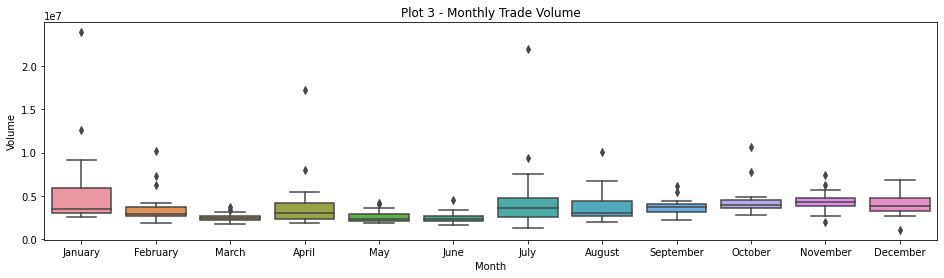

In [131]:
# Boxplot to view 2020 monthly trade volume 
fig, ax = plt.subplots(figsize=(16,4))
sns.boxplot(data=df2, x='month', y=df2['Volume'], ax = ax)
ax.set_title("Plot 2 - Monthly Trade Volume")
ax.set_xlabel('Month')
ax.set_ylabel('Volume')

Text(0, 0.5, 'Trade volume')

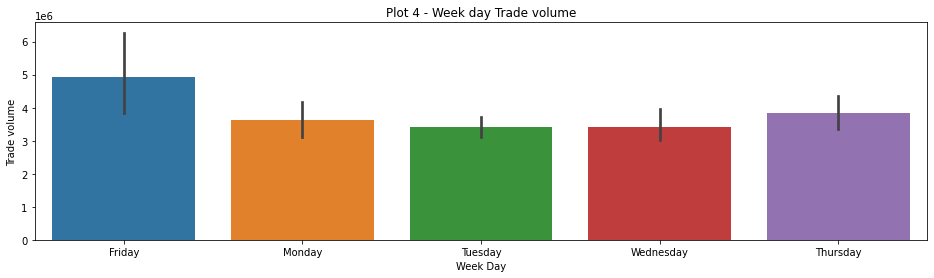

In [132]:
# Barplot to view 2020 weekly trade volume
fig, axes = plt.subplots(1,1,squeeze=False)
fig.set_size_inches(16,4)
sns.barplot(data=df2, x='day_of_week', y=df2['Volume'],ax=axes[0,0])
axes[0,0].set_title("Plot 3 - Week day Trade volume")
axes[0,0].set_xlabel('Week Day')
axes[0,0].set_ylabel('Trade volume')

Text(0.5, 0, 'Year')

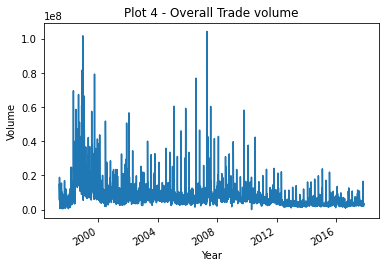

In [397]:
df['Volume'].plot()
plt.title('Plot 4 - Overall Trade volume')
plt.ylabel('Volume')
plt.xlabel('Year')

### Summary

1. There is clear evidence of seasonality patterns occuring as quarterly increases in trade volume, this is especially true for the beginning and middle of the year. This may correlate with companies releasing their quarterly results.
2. This bar plot is similar to plot 1, with large spikes probably hinting at trades happening soon after quarterly results are released or other means.
3. As the stock market is closed on weekends, no trades are done then. What we can observe above is the that Friday sees the most trades which may be due to people being unable to trade for the next two days after.
4. The greatest spikes can be seen around 1997 and 2007-2008 which are both during periods of a financial crisis.

### Outliers

Outliers can be seen in plot 1 where a dip can be seen which could've occured due to a number of different reasons like outside factors or a correction after the spike which may be a trait in stocks. Outliers can also be seen in the monthly trade volume. These outliers may just be outliers but are more likely due to other factors whether its an outside factor or somethig that needs to be identified more closely is unknown.

## 3. Stock Volume Time Series

### Splitting Data

Split the data into training and testing data sets. As the testing will be the last 3 months, the training set will be the remaining data.

In [342]:
testing = df.last("3M")
training = df['1998':'2016'] # Start at the beginning of the year in 1998

### STR Decomposition

#### Automatic decomposition of Volume

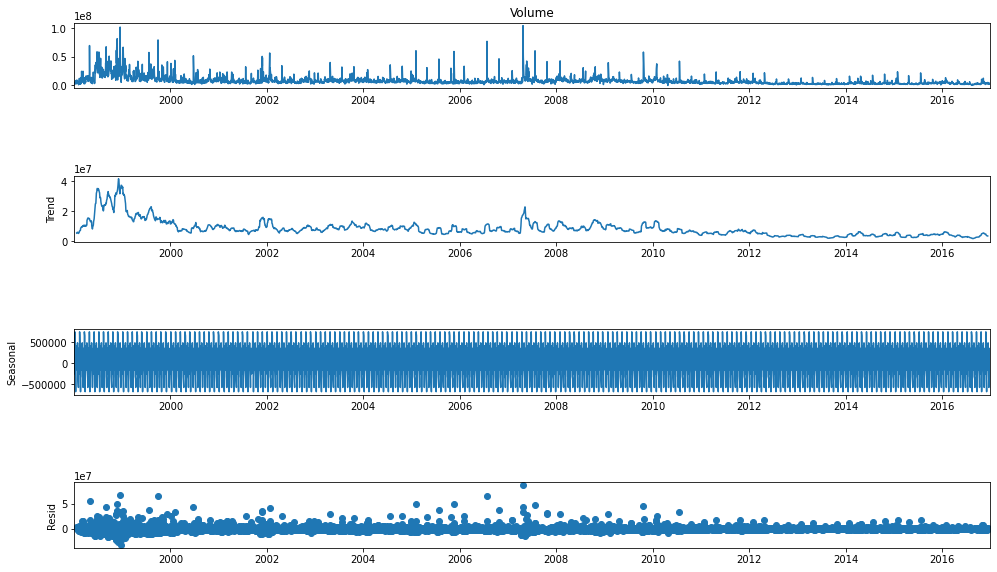

In [343]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 25 as this is the amount of days in a working month
str_res = seasonal_decompose(training['Volume'], period = (25))
fig = str_res.plot()
fig.set_size_inches((16, 9))

We will try to replicate the above. Our goal is to split the timeseries into a trend, seasonal and residual cycle.

#### Isolate the trend

We combine the trend and cycle into a single trend-cycle component by using a moving average filter.

Since our data is 5 days a week, we can either roll weekly or monthly.

/tmp/ipykernel_374292/3374230034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['weekly'] = training['Volume'].rolling(5).mean() # Weekly
/tmp/ipykernel_374292/3374230034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['monthly'] = training['Volume'].rolling(25).mean() # Monthly


<AxesSubplot:xlabel='Date'>

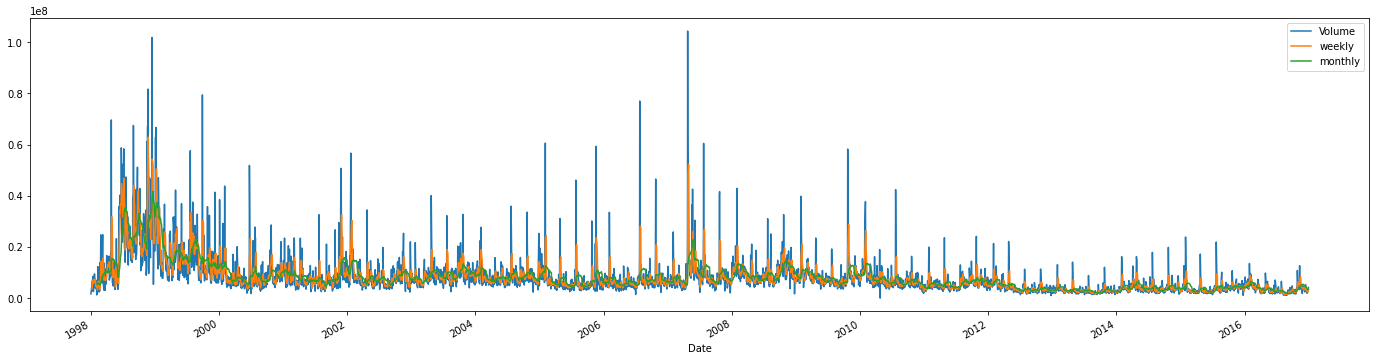

In [344]:
training['weekly'] = training['Volume'].rolling(5).mean() # Weekly 
training['monthly'] = training['Volume'].rolling(25).mean() # Monthly
training[['Volume','weekly','monthly']].plot(figsize=(24,6))

Both show the peaks of trading volume, a closer look will be taken.

/tmp/ipykernel_374292/2778801352.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  training['2015'][['Volume','weekly','monthly']].plot(figsize=(24,6))


<AxesSubplot:xlabel='Date'>

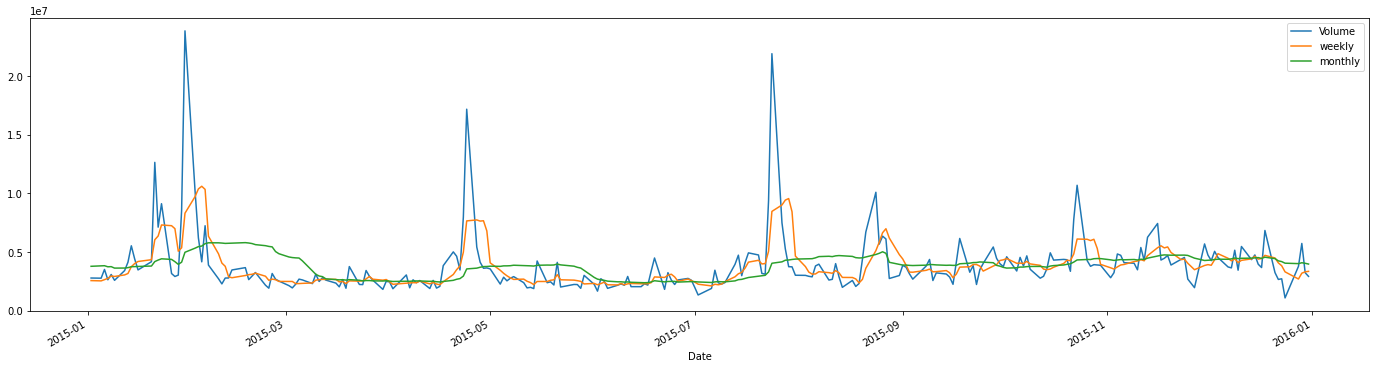

In [345]:
training['2015'][['Volume','weekly','monthly']].plot(figsize=(24,6))

The weekly plot shows the seasonal pattern more clearly than the monthly, with more visiable dips also being seen in the Weekly plot. Weekly patterns aren't seen in either as fridays usually see an increase in volume.

The monthly plot is much smootheer but doesn't display any seasonality, therefore, the weekly plot will be most appropriate.

#### Calculate the de-trended series

The de-trended Volume series will be calculated next. This will be done by subtracting the weekly trend from the original Volume data.

/tmp/ipykernel_374292/4169992312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['De-trended'] = training['Volume'] - training['weekly']


<AxesSubplot:xlabel='Date'>

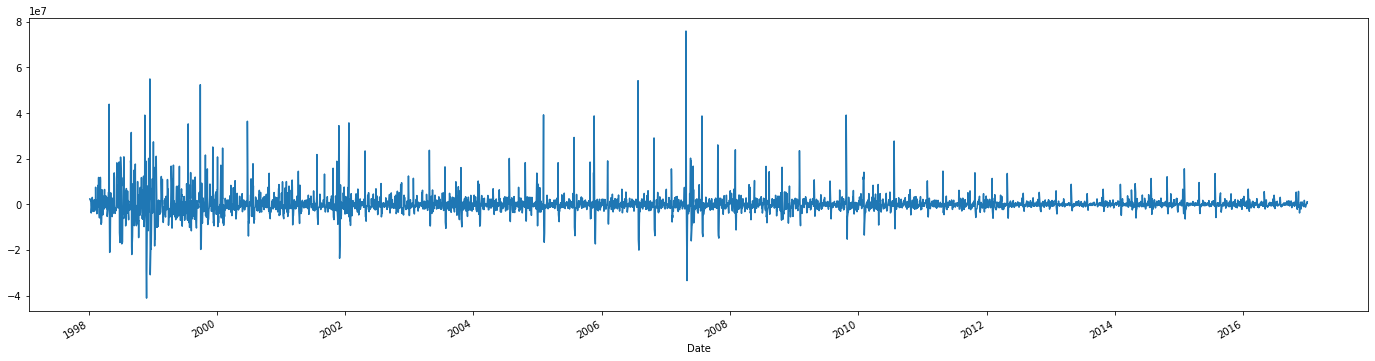

In [346]:
training['De-trended'] = training['Volume'] - training['weekly']
training['De-trended'].plot(figsize=(24,6))

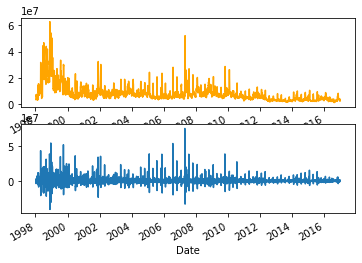

In [347]:
fig, ax_detrended = plt.subplots(2)
training['weekly'].plot(color='orange', label='Weekly Trend', ax=ax_detrended[0])
training['De-trended'].plot(label='De-trended', ax=ax_detrended[1])
plt.show()

#### Estimate the seasonal component

To estimate the seasonal component, the mean of each week will be estimated where it will then be plotted.

/tmp/ipykernel_374292/1925963297.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  raw_weekly_means = training.groupby(training.index.week)['De-trended'].mean()


<AxesSubplot:xlabel='Date'>

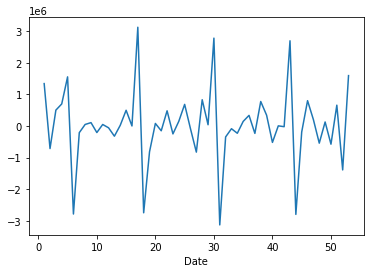

In [348]:
raw_weekly_means = training.groupby(training.index.week)['De-trended'].mean()
raw_weekly_means.plot()

The seasonal components need to sum to zero or a bias will be introduced. This will be done by creating an adjustment number which is the sum of the weekly means divided by the number of weekly means. the weekly means is then subtracted by the adjustment and this new value will be used.

In [349]:
raw_weekly_means.count()

53

In [350]:
# Shift values so that seasonal components sum to zero so there isn't any bias in the data
adjustment = raw_weekly_means.sum()/(53) #53 is used as the count for raw_weekly_means
week_means = raw_weekly_means - adjustment
week_list = week_means.tolist()[4:] + week_means.tolist()[:4]

A clear trend can be seen as sudden spikes then dips at evenly spaced intervals.

Now we have to fill the series for the entire data set.

/tmp/ipykernel_374292/151854397.py:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  training['2016']['Volume-seasonal'].plot(figsize=(24,6))


<AxesSubplot:xlabel='Date'>

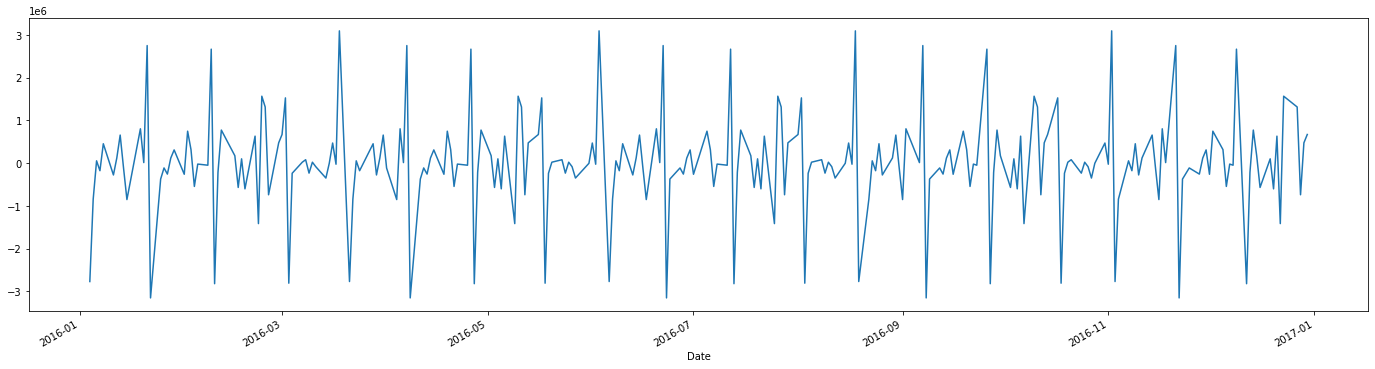

In [351]:
import numpy as np
# tile the values into the dataframe so that the entire series is filled

seasonal = np.tile(week_list,int(np.floor(len(training)/53)))# used typeout to check lengths:
# len(seasonal), len(training)
training = training.iloc[6:]

training['Volume-seasonal'] = seasonal
training['2016']['Volume-seasonal'].plot(figsize=(24,6))

#### Calculate the residual component

Calcuating the residual can be done by subtracting the seasonal component from the detrended data.

<AxesSubplot:xlabel='Date'>

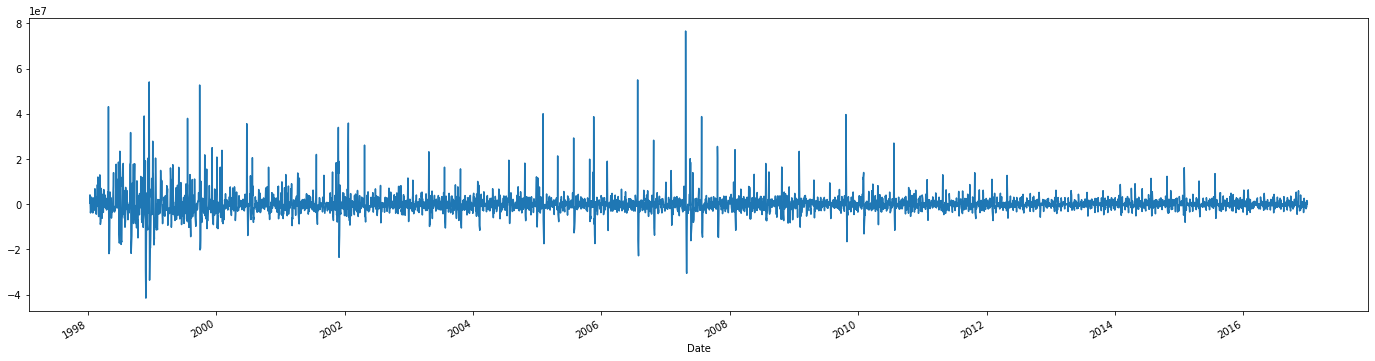

In [352]:
training['Volume-residual'] = training['De-trended'] - training['Volume-seasonal']
training['Volume-residual'].plot(figsize=(24,6))

Putting the four plots on one figure:

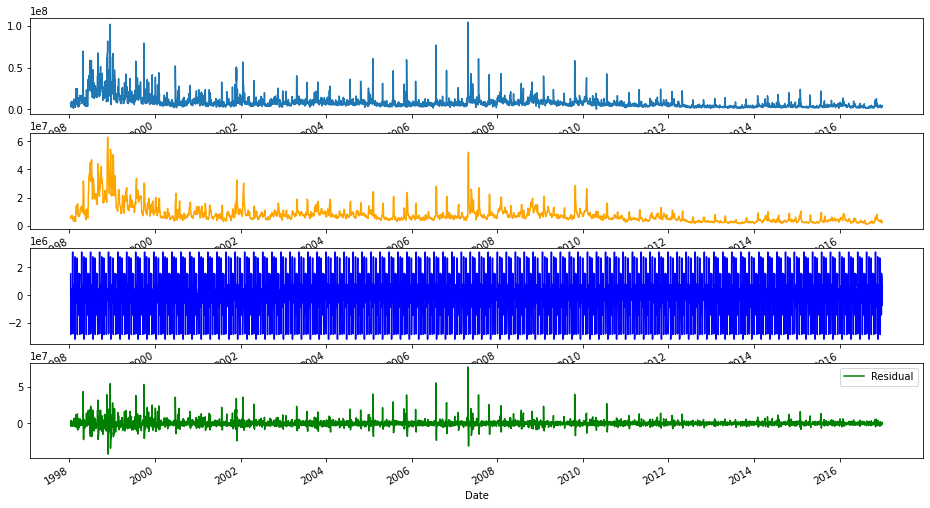

In [353]:
import matplotlib.pyplot as plt
fig, ax_str = plt.subplots(4)
training['Volume'].plot(label='Original', ax=ax_str[0])
training['weekly'].plot(color='orange', label='Weekly Trend', ax=ax_str[1])
training['Volume-seasonal'].plot(color='blue', label='Seasonal', ax=ax_str[2])
training['Volume-residual'].plot(color='green', label= 'Residual', ax=ax_str[3])
fig.set_size_inches((16, 9))
plt.legend()
plt.show()

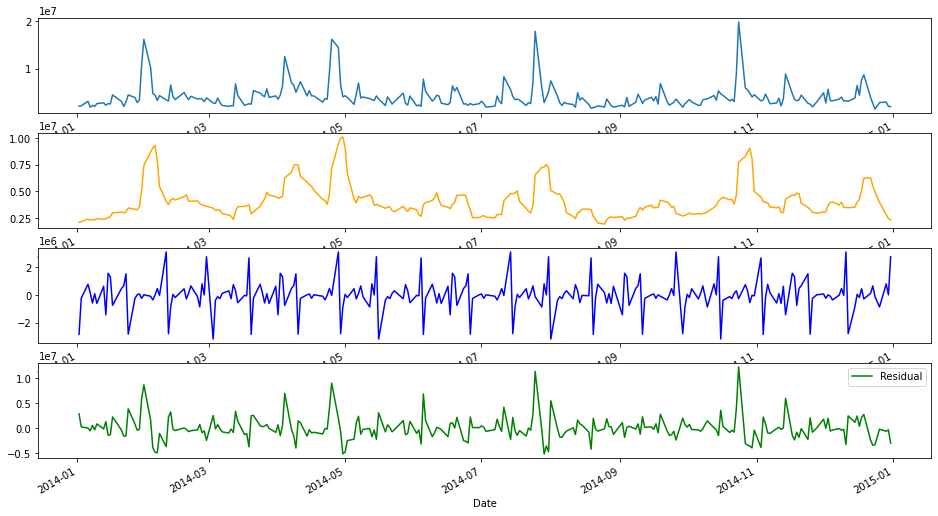

In [354]:
fig, ax_str_2 = plt.subplots(4)
training['Volume']['2014'].plot(label='Original', ax=ax_str_2[0])
training['weekly']['2014'].plot(color='orange', label='Weekly Trend', ax=ax_str_2[1])
training['Volume-seasonal']['2014'].plot(color='blue', label='Seasonal', ax=ax_str_2[2])
training['Volume-residual']['2014'].plot(color='green', label= 'Residual', ax=ax_str_2[3])
fig.set_size_inches((16, 9))
plt.legend()
plt.show()

Above we can see the plots which resembles the seasonal_decompose function.

## 4. Modelling trends with ARIMA

### Check for stationarity

<AxesSubplot:xlabel='Date'>

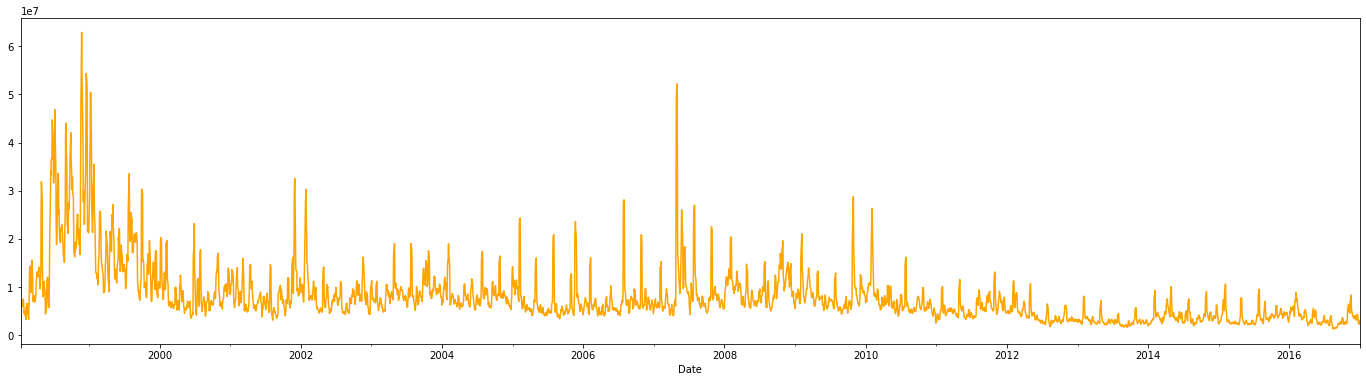

In [398]:
training['weekly'].plot(color='orange', figsize=(24,6))

<AxesSubplot:xlabel='Date'>

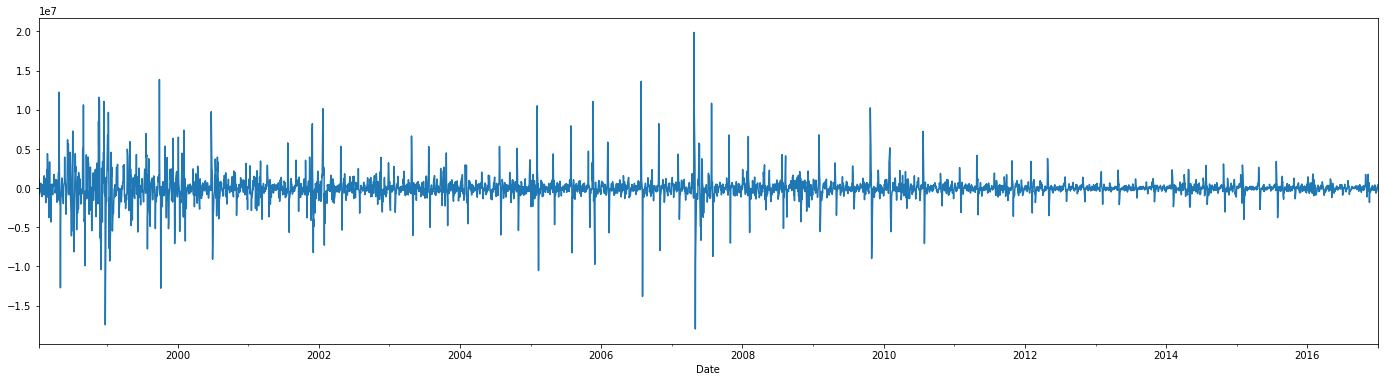

In [399]:
trend_d1 = training['weekly'].diff()
trend_d1.plot(figsize=(24,6))

The series seems stationary with the variance being roughly constant. No further differences need to be done.

<b>Keep note of <i>d</i> = 1.</b>

### Fit a lower order model

Next we use the ARIMA fitting and analysis tools from StatsModels

In [400]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import statsmodels.api as sm

In [401]:
# trim the nan's from the differenced trend 
trend_d1 = trend_d1[25:]

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


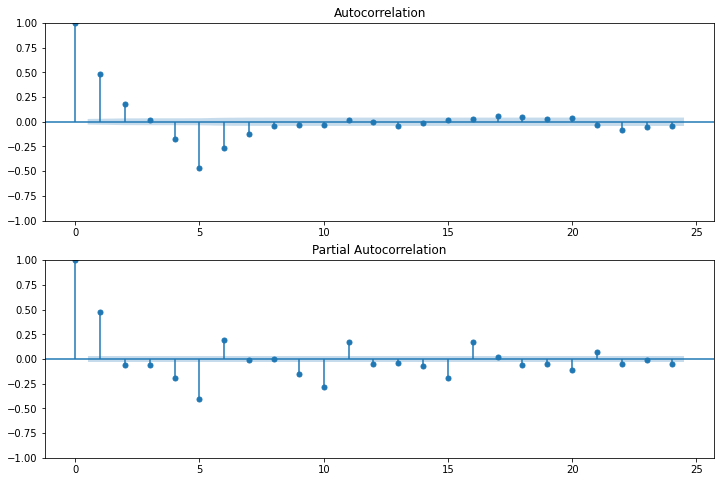

In [402]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(trend_d1, lags=24, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(trend_d1, lags=24, ax=ax2)

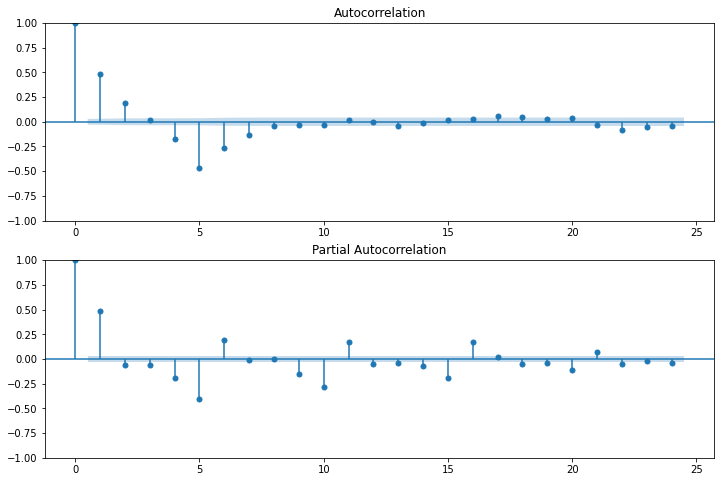

In [403]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(trend_d1[25:], lags=24, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(trend_d1[25:], lags=24, ax=ax2)

As the ACF function isn't very slowly decline, there is no need to diffference the data again. A slowly decline ACF function is a sign of being non-stationary.

#### Fit ARIMA model

Now that the data has been made stationary, it can be modelled with an ARMA process. However, when using the software, it is best to use the full ARIMA model and set d=1 as determined above. This is a simple call to the ARIMA method in StatsModels, starting with p = 1 and q = 0.

d = 1 since it was differenced only once.

In [404]:
training.index = pd.DatetimeIndex(training.index).to_period('D')
arima_1_1_0 = ARIMA(training['weekly'], order=(1, 1, 0)).fit()
print(arima_1_1_0.summary())

TypeError: Passing PeriodDtype data is invalid. Use `data.to_timestamp()` instead

In [ ]:
fig = plt.figure(figsize=(16, 9))
fig = arima_1_1_0.plot_diagnostics(fig=fig, lags=25)

#### Fit higher-order models

Increase the AR lag parameter and re-fit to see if an improvement will help.

In [ ]:
arima_2_1_0 = ARIMA(training['weekly'], order=(2, 1, 0)).fit()
print(arima_2_1_0.summary())

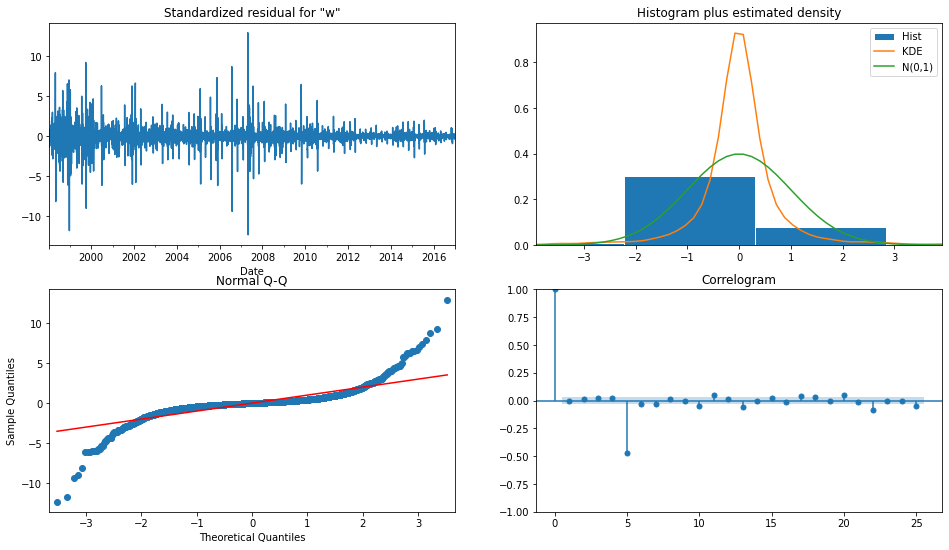

In [405]:
fig = plt.figure(figsize=(16, 9))
fig = arima_2_1_0.plot_diagnostics(fig=fig, lags=25)

Looking at the summary outputs, the AIC for ARIMA(1,1,0) is  148645, while for ARIMA(1,2,0) it is 148630. Although a lower AIC and BIC score is prefered, there isn't big enough difference to look into further improvements.
ARIMA(1,1,0) will be used.

##### Increase MA
Increasing the MA = 1 will be done to check for possible improvements.

In [406]:
arima_2_1_1 = ARIMA(training['weekly'], order=(2, 1, 1)).fit()
print(arima_2_1_1.summary())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                 weekly   No. Observations:                 4770
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -74141.931
Date:                Mon, 07 Nov 2022   AIC                         148291.861
Time:                        06:42:48   BIC                         148317.741
Sample:                    01-12-1998   HQIC                        148300.953
                         - 12-30-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4096      0.007    211.083      0.000       1.397       1.423
ar.L2         -0.5390      0.006    -84.637      0.000      -0.552      -0.527
ma.L1         -0.9633      0.003   -275.281      0.0

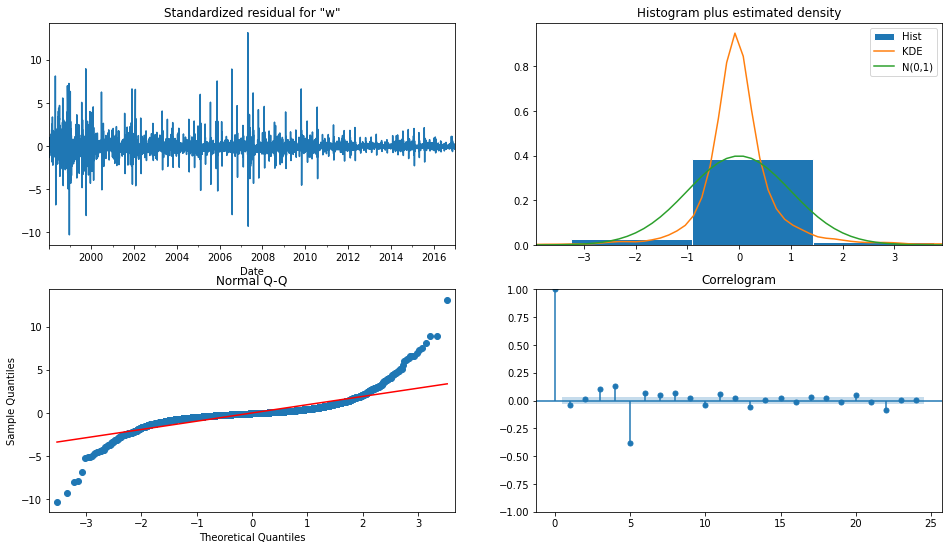

In [407]:
fig = plt.figure(figsize=(16, 9))
fig = arima_2_1_1.plot_diagnostics(fig=fig, lags=24)

In summary, the AIC for Arima 1,1,0 is 148645 while for ARIMA(1,2,1) is 148768 which is an increase in value. No further improvement must be made.

### Forecasting with ARIMA

#### Mean Trend Prediction

In [408]:
# Generate Forecasts
testing.index = pd.DatetimeIndex(testing.index).to_period('D') # To allow time variables to be indexed.
arima_pred = pd.DataFrame(index=testing.index)
arima_pred['Trend'] = arima_2_1_1.predict(start="2017-08-01", end="2017-11-10")

TypeError: Passing PeriodDtype data is invalid. Use `data.to_timestamp()` instead

In [ ]:
# Plot graphs
fig, ax_arma = plt.subplots(figsize=(24,6))
training['Volume']['2016':].plot(label='Original', ax=ax_arma)
testing['Volume'].plot(color='grey', label='Actuals', ax=ax_arma)
training['weekly']['2016':].plot(color='orange', label='weekly trend', ax=ax_arma)
arima_pred['Trend'].plot(color='red', label='Mean Arima forecast', ax=ax_arma)
plt.legend()

Above we can observe that the line is straight and doesn't either ascend or descend. This may be due to how continuous the graph is as big spikes that occur are never long lasting and my be equalised by a dip.

## 5. Pure Forecaster

A Nueralnetwork will be used as a pure forecasting method for the timeseries data.

In [ ]:
# !pip install tensorflow
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow import keras

The previous four observations will be used to predict the future values, this may not be sufficient however as it doesn't display the weekly changes effectively.

In [ ]:
data = pd.concat([df, 
                 df.shift(), 
                 df.shift(2),
                 df.shift(3),
                 df.shift(4)], 
                 axis=1
                 ).dropna()

In [ ]:
data_np = np.array(data)

The data set will be split into test and training sets.

In [ ]:
testing.count()

The data will be split into training and test sets, and scale to values suitable for input to a Keras neural network. The test sets will only contain the last 50 which are the same as the testing values from earlier.

In [ ]:
# train test split, we can take last 1000 data points as test set
train, test = data_np[0:-1000], data_np[-50:]

# Scale
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# training data
y_train = train_scaled[:,0]
X_train = train_scaled[:,1:]

# test data
y_test = test_scaled[:,0]
X_test = test_scaled[:,1:]

### Configure Network

In [ ]:
# Configure model
learning_rate = 0.001 # NN weight update rates

This function below configures a feed-forward network by using a mix of hidden layer sizes and activation functions.

In [ ]:
def slff_relu(input_dim,hidden_1_dim = 64):
    # Single-layer FF network with Rectified linear unit (relu) activation fxn
    inputs = keras.layers.Input(shape=(input_dim))
    hidden_layer_1 = keras.layers.Dense(hidden_1_dim, activation='relu')(inputs)
    outputs = keras.layers.Dense(1,activation='tanh')(hidden_layer_1)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
## typeout block below to prevent retraining
input_dim = 4 # equal to the number of lagged variables
model = slff_relu(input_dim)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

In [ ]:
# Fit
model.fit(X_train, y_train, epochs=30, batch_size=50, shuffle=False)

### Forecasting

In [409]:
# Predict
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


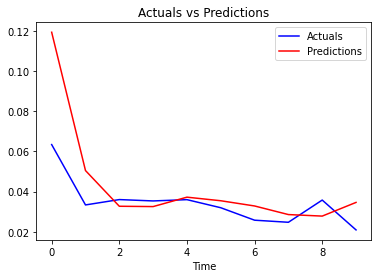

In [410]:
# Plot test data predictions
def plot_pred(y_test,y_pred,period=10):
    plt.figure()
    plt.plot(y_test[-period:], "b", label="Actuals")
    plt.plot(y_pred[-period:], "r", label="Predictions")
    plt.title("Actuals vs Predictions")
    plt.xlabel("Time")
    plt.legend()
    plt.show()

plot_pred(y_test,y_pred)

The predictions are similar to te actual results.

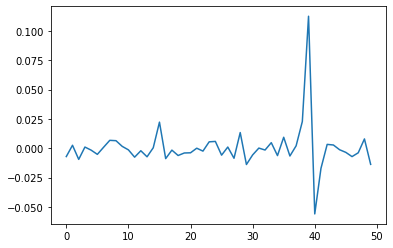

In [411]:
# Compute and plot the test data errors
errors = np.squeeze(y_test) - np.squeeze(y_pred)
plt.plot(errors)

The spikes that might be linked to the quartely spikes are considered to be data errors, this may be due to not enough data being present in the testing data or not enough previous values being compared to.

## Multistep point prediction

The multistep prediction loop include an optional residuals input, which is used later for bootstrapping.

In [412]:
def multistep_prediction(H, model, X_pred,residuals=[]):
    # Initialise lists for storing multi-step predictions
    y_pred_multi = []
    X_pred_multi = []

    for t in range(H):
        # get next prediction
        X_pred = np.array(X_pred.reshape(1,len(X_pred)))
        new_y= float(model.predict(X_pred))
    
        # update 
        y_pred_multi.append(float(new_y))
        X_pred_multi.append(list(X_pred[0])) 
    
        # prepare net input with bootstrapped training residuals
        X_pred = X_pred_multi[t][:-1]
        if len(residuals) == 0:
            X_pred.insert(0,new_y)
        else:
            X_pred.insert(0,(new_y+np.random.choice(residuals)))
        X_pred = np.array(X_pred)
        
    return y_pred_multi, X_pred_multi

1/1 [==============================] - 0s 29ms/step


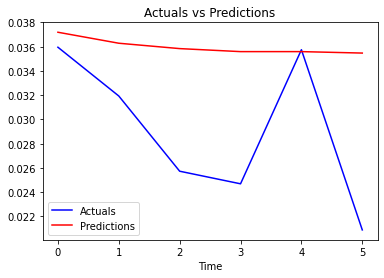

In [382]:
# Prediction horizon
H = 6

X_test_multi = X_test[-H:,:]
y_test_multi = y_test[-H:]

# Prepare first input to multistep prediction loop
X_pred = X_test_multi[0,:]

# Multistep prediction
y_pred_multi, X_pred_multi = multistep_prediction(H,model,X_pred)
plot_pred(y_test_multi, y_pred_multi)

Above we observe a large difference between the actual vs prediction plot. This may be because of the same reason as stated before.

###  Bootstrapping for interval predictions using neural networks

In [383]:
residuals = np.squeeze(y_train) - np.squeeze(model.predict(X_train))

130/130 [==============================] - 0s 2ms/step


In [384]:
# Bootstrap iterations
K = 100

# Prepare first input to multistep bootsrtap loop
X_pred = X_test_multi[0,:]
y_pred_bootstrap = []

# Use multistep prediction to generate bootstrap data, 
# List of training residuals to sample from passed in as fourth argument 

for k in range(K):
    y_pred_multi, X_pred_multi = multistep_prediction(H,model,X_pred,residuals)
    y_pred_bootstrap.append(y_pred_multi)
    # store y predictions

1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 56ms/step


### Visualising bootstrapped interval forcasts

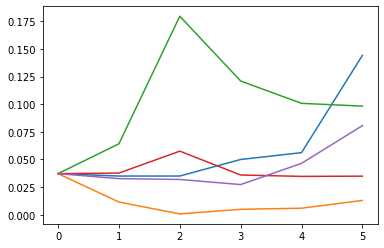

In [385]:
# Useful utility method for transposing lists of lists    
def transposed_2d_list(l):
    return [[row[i] for row in l] for i in range(len(l[0]))]    

plt.plot(transposed_2d_list(y_pred_bootstrap[-5:]))

In [386]:
bootstrap_predictions = pd.DataFrame(index = data.index.values[-H:])

for pctl in range(0,101,10):
    bootstrap_predictions[str(pctl)] = np.percentile(y_pred_bootstrap,pctl,axis=0)

bootstrap_predictions.rename(columns={'50': "median"}, inplace=True)
bootstrap_predictions['actuals'] = y_test[-H:]

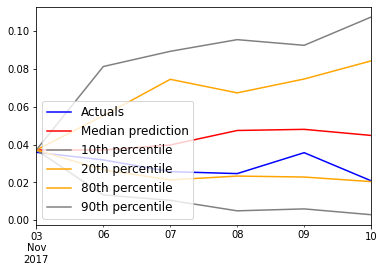

In [387]:
# plot some deciles
fig, ax_bootstrap_2 = plt.subplots()
bootstrap_predictions['actuals'].plot(color = 'blue', label='Actuals', axes=ax_bootstrap_2)
bootstrap_predictions['median'].plot(color = 'red',label = 'Median prediction', axes=ax_bootstrap_2 )
bootstrap_predictions['10'].plot(color = 'grey',label = '10th percentile', axes=ax_bootstrap_2 )
bootstrap_predictions['20'].plot(color = 'orange',label = '20th percentile', axes=ax_bootstrap_2 )
bootstrap_predictions['80'].plot(color = 'orange',label = '80th percentile', axes=ax_bootstrap_2 )
bootstrap_predictions['90'].plot(color = 'grey',label = '90th percentile', axes=ax_bootstrap_2 )
plt.legend(loc = 'lower left', fontsize = 12)

Above we can observe a that the 80th percentile plot was closest to the actual values.

### Seasonality forecast

In [388]:
arima_pred['Seasonal'] = ''
for t in range(len(arima_pred)):
    arima_pred['Seasonal'][t] = arima_pred['Trend'][t] + week_list[np.mod(t,12)]

/tmp/ipykernel_374292/2525344484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arima_pred['Seasonal'][t] = arima_pred['Trend'][t] + week_list[np.mod(t,12)]


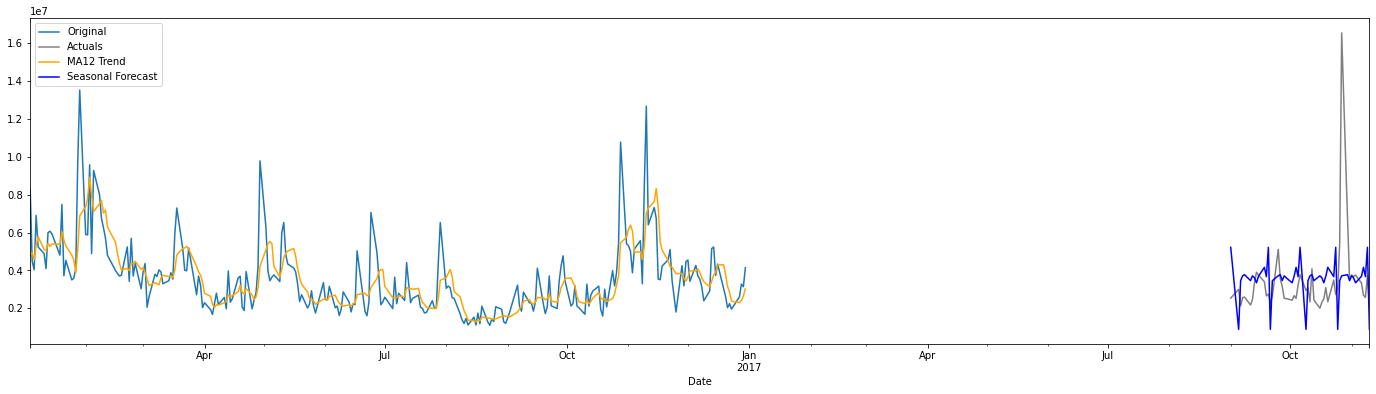

In [389]:
fig, ax_arma = plt.subplots(figsize=(24,6))
training['Volume']['2016'].plot(label='Original', ax=ax_arma)
testing['Volume'].plot(color='grey', label='Actuals', ax=ax_arma)
training['weekly']['2016'].plot(color='orange', label='MA12 Trend', ax=ax_arma)
arima_pred['Seasonal'].plot(color='blue', label='Seasonal Forecast', ax=ax_arma)
plt.legend()

Above we can observe that the trend isn't completely in sync with the data but doest display the sudden increases through the week. 

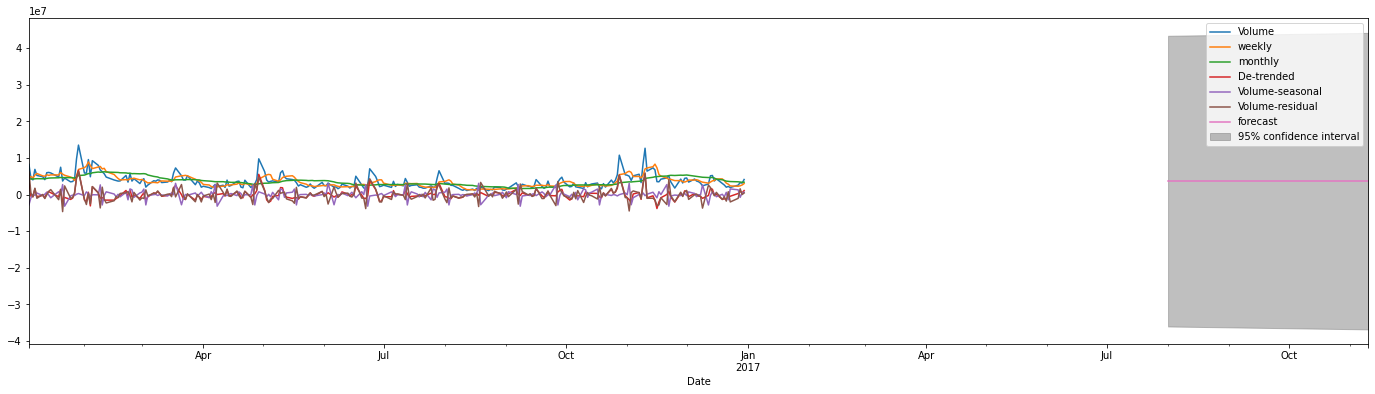

In [390]:
fig, ax_arma = plt.subplots(figsize=(24,6))
training['2016':].plot(label='Original', ax=ax_arma)
fig = plot_predict(arima_2_1_1, start="2017-08-01", end="2017-11-10", label='ARIMA(2,1,1) Forecast', ax=ax_arma)

The confidence interval is shown to be very wide with quite a linear forecast. The wide interval may be due to an error in inputing the values or the frequent peaks and dips. The latter is unlikely as a continous decrease of trading volume can be seen as the years have gone by.

## 6. Evaluation

In [391]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

def rmse(y_true,y_pred):
    return mse(y_true,y_pred)**(0.5)

In [392]:
mae(y_test, y_pred)

0.00905409211758315

In [393]:
rmse(y_test, y_pred)

0.019375112043451853

In [394]:
mae(bootstrap_predictions['actuals'],bootstrap_predictions['median'])

0.013285270462192354

In [395]:
from sklearn.metrics import mean_pinball_loss as mpl
mpl(bootstrap_predictions['actuals'],bootstrap_predictions['median'], alpha=0.5) # alpha=0.5 for the median

0.006642635231096177

All values are close to zero which is what we're looking for as values closer to 0 indicate a higher accuracy. These tests evaluate the neural network and given the high accuracy, would be useful in forecasting future events but may need tweeks such as using a significantly higher comparision size to compare volume by and a larger testing size. 

With the ARIMA forecasting, the mean trend forecasting gave a glimpse of how the data would still be flat as the changes happen over the course of years so this method may be effective only for predicted larger test sizes. The seasonality trend showed the weekly trends but didn't show the quarterly spikes. Maybe a larger rolling number would've shown this better.

No tests are better than other tests but certain one may be better for specific scenarios, doing multiple forecasts displays which ones would be better in forecasting amazon stock as a long term trending and seasonal plot that's affected by many outside factors.